Silhouette score: 0.41323939557768136
Confusion matrix:
TN = 8435 FP = 710
FN = 562 TP = 293
Precision: 0.292123629112662
Recall: 0.34269005847953216


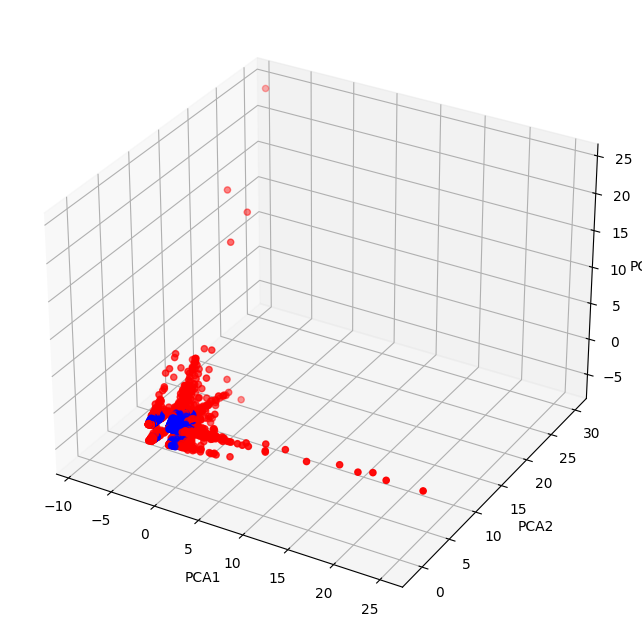

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
df = df.sample(n=10000)
X = df.drop(['fraud'], axis=1)
y = df['fraud']

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

kerneli = ['rbf', 'sigmoid', 'linear']
nu = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

best_score = -1
best_kernel = ''
best_nu = -1

for k in kerneli:
    for n in nu:
        svm = OneClassSVM(kernel=k, nu=n).fit(X)
        y_pred = svm.predict(X)
        score = metrics.silhouette_score(X, y_pred)
        if score > best_score:
            best_score = score
            best_kernel = k
            best_nu = n

svm = OneClassSVM(kernel=best_kernel, nu=best_nu).fit(X)
y_pred = svm.predict(X)
sil_skor = metrics.silhouette_score(X, y_pred)
print('Silhouette score:', sil_skor)

y_pred = np.where(y_pred == -1, 1, 0)
tn, fp, fn, tp = metrics.confusion_matrix(y, y_pred).ravel()
print('Confusion matrix:')
print('TN =', tn, 'FP =', fp)
print('FN =', fn, 'TP =', tp)

# preciznost i odziv (rucno implementirani)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('Precision:', precision)
print('Recall:', recall)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = np.where(y_pred == 1, 'r', 'b')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()


Silhouette score: 0.442124544810927
Confusion matrix:
TN = 8428 FP = 666
FN = 696 TP = 210
Precision: 0.23972602739726026
Recall: 0.23178807947019867


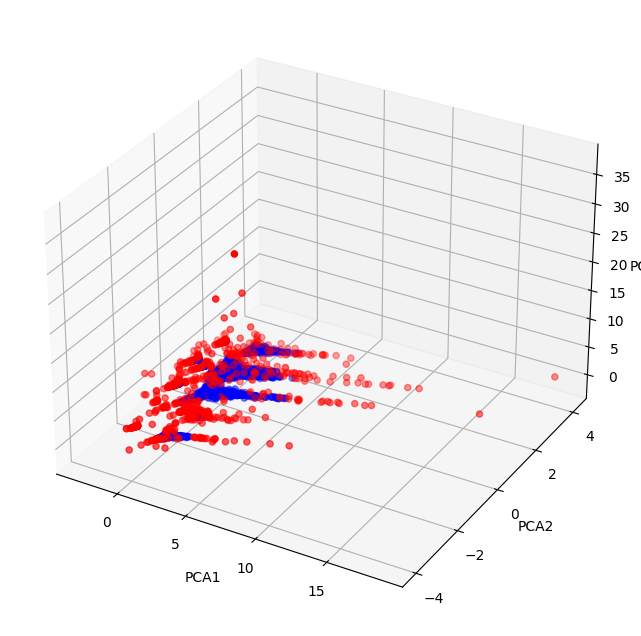

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
df = df.sample(n=10000)
X = df.drop(['fraud'], axis=1)
y = df['fraud']

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

n_estimators = [100, 200,300,400]
max_samples = [0.1, 0.2, 0.3,0.4,0.5]

best_score = -1
best_n_estimators = -1
best_max_samples = -1

for n in n_estimators:
    for s in max_samples:
        ifor = IsolationForest(n_estimators=n, max_samples=s).fit(X)
        y_pred = ifor.predict(X)
        score = metrics.silhouette_score(X, y_pred)
        if score > best_score:
            best_score = score
            best_n_estimators = n
            best_max_samples = s

ifor = IsolationForest(n_estimators=best_n_estimators, max_samples=best_max_samples).fit(X)
y_pred = ifor.predict(X)
sil_skor = metrics.silhouette_score(X, y_pred)
print('Silhouette score:', sil_skor)

n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
colors = ['blue' if label != -1 else 'red' for label in y_pred]

y_pred = np.where(y_pred == -1, 1, 0)
tn, fp, fn, tp = metrics.confusion_matrix(y, y_pred).ravel()
print('Confusion matrix:')
print('TN =', tn, 'FP =', fp)
print('FN =', fn, 'TP =', tp)

# preciznost i odziv (rucno implementirani)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('Precision:', precision)
print('Recall:', recall)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()



Silhouette score: 0.9295662411693804


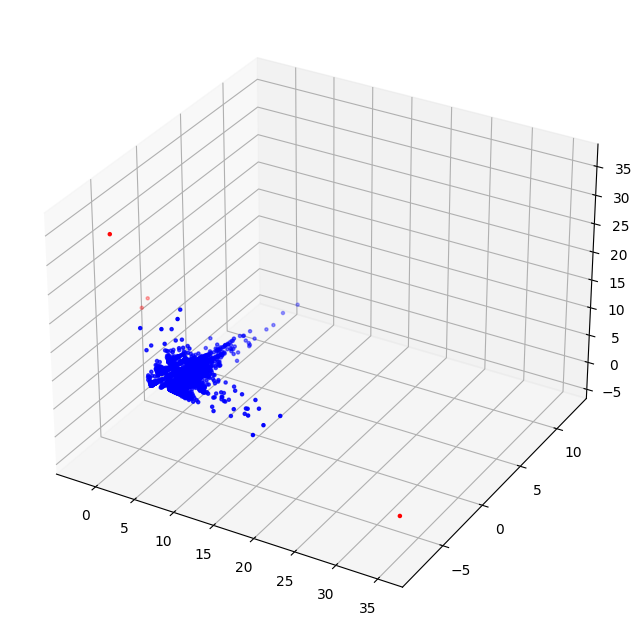

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
df = df.sample(n=10000)
X = df.drop(['fraud'], axis=1)
y = df['fraud']

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X = pca.fit_transform(X)

eps = np.linspace(0.2, 4.0, num=8)
min_samples = range(3, 8)

best_score = -1
best_eps = -1
best_min_samples = -1

for e in eps:
    for m in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=m).fit(X)
        score = metrics.silhouette_score(X, dbscan.labels_)
        if score > best_score:
            best_score = score
            best_eps = e
            best_min_samples = m

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
sil_skor = metrics.silhouette_score(X, dbscan.labels_)
print('Silhouette score:',sil_skor )

y_pred = dbscan.labels_
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters+1))

# iscrtavanje grafika sa obojenim tačkama
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, color in zip(set(y_pred), colors):
    if i != -1:
        # Tačke koje su označene kao anomalije
        ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], X[y_pred==i, 2], color='blue', s=5)
    elif i==-1:
        # Tačke koje nisu označene kao anomalije
        ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], X[y_pred==i, 2], color='red', s=5)

plt.show()


Silhouette score: 0.8971251288044007


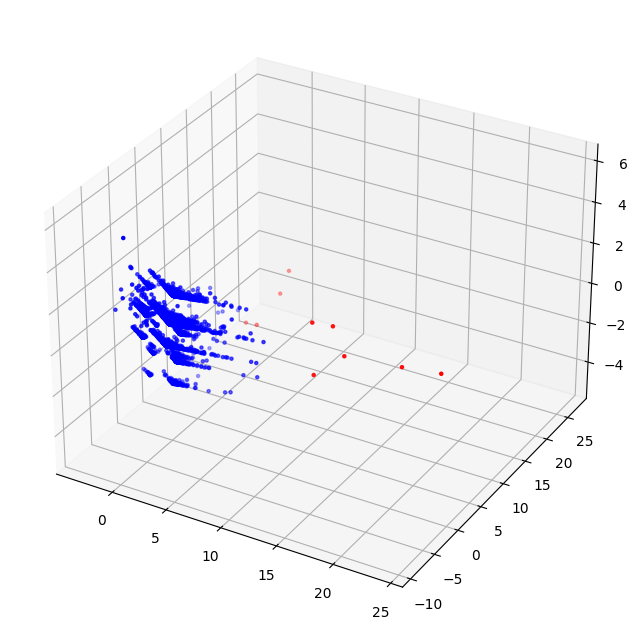

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
df = df.sample(n=10000)
X = df.drop(['fraud'], axis=1)
y = df['fraud']

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X = pca.fit_transform(X)

eps = np.linspace(0.2, 4.0, num=8)
min_samples = range(3, 8)

best_score = -1
best_eps = -1
best_min_samples = -1

for e in eps:
    for m in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=m).fit(X)
        score = metrics.silhouette_score(X, dbscan.labels_)
        if score > best_score:
            best_score = score
            best_eps = e
            best_min_samples = m

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
sil_skor = metrics.silhouette_score(X, dbscan.labels_)
print('Silhouette score:',sil_skor )

y_pred = dbscan.labels_
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters+1))

# iscrtavanje grafika sa obojenim tačkama
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, color in zip(set(y_pred), colors):
    if i != -1:
        # Tačke koje nisu označene kao anomalije
        ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], X[y_pred==i, 2], color='blue', s=5)
    elif i==-1:
        # Tačke koje su označene kao anomalije
        ax.scatter(X[y_pred==i, 0], X[y_pred==i, 1], X[y_pred==i, 2], color='red', s=5)

plt.show()


### ***dodatak iz prethodne sveske***

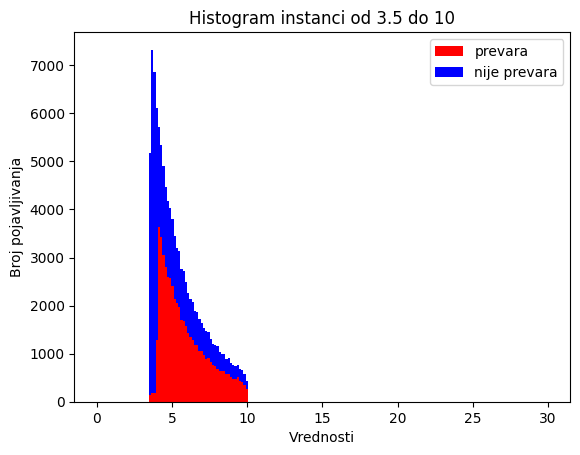

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/card_transdata.csv')
X = df.drop(['fraud'], axis=1)
y = df['fraud']

prevare = (y == 1)
x_prevara = X[prevare]
x_prevara = pd.DataFrame(x_prevara)
prevara = x_prevara[x_prevara.iloc[:, 2].between(3.5, 10)]

x_nije_prevara = X[~prevare]
x_nije_prevara = pd.DataFrame(x_nije_prevara)
nije_prevara = x_nije_prevara[x_nije_prevara.iloc[:, 2].between(3.5, 10)]

plt.hist([prevara.iloc[:, 2], nije_prevara.iloc[:, 2]], bins=200, range=(0, 30), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
plt.xlabel('Vrednosti')
plt.ylabel('Broj pojavljivanja')
plt.title('Histogram instanci od 3.5 do 10')
plt.legend()
plt.show()


# **0-3 pre skaliranja plot**

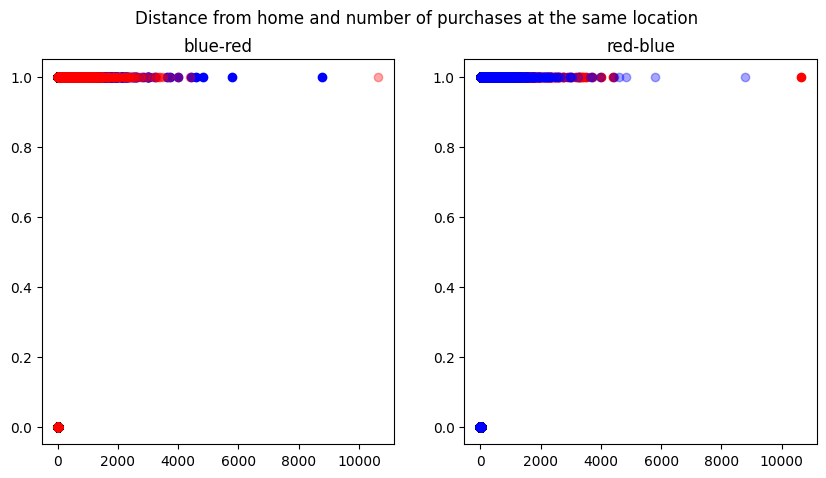

Nije ista lokacija i prevara:  10478
ista lokacija i prevara:  76925
Nije ista lokacija i nije prevara:  107986
ista lokacija i nije prevara:  804611


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/card_transdata.csv')
X = df.drop(['fraud'], axis=1)
y = df['fraud']

fraud_indexes = (y == 1)
fraud_x = X[fraud_indexes]
non_fraud_x = X[~fraud_indexes]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# blue-red
axes[0].scatter(non_fraud_x.iloc[:,0], non_fraud_x.iloc[:,3], c='blue')
axes[0].scatter(fraud_x.iloc[:,0], fraud_x.iloc[:,3], c='red', alpha=.35)
axes[0].set_title('blue-red')

# red-blue
axes[1].scatter(fraud_x.iloc[:,0], fraud_x.iloc[:,3], c='red')
axes[1].scatter(non_fraud_x.iloc[:,0], non_fraud_x.iloc[:,3], c='blue', alpha=.35)
axes[1].set_title('red-blue')

fig.suptitle('Distance from home and number of purchases at the same location')
plt.show()


print("Nije ista lokacija i prevara: ",sum((x_prevara.iloc[:,3]==0)))  #da je broj kupovina na istoj lokaciji = 0 , da je prevara
print("ista lokacija i prevara: ",sum((x_prevara.iloc[:,3]==1)))  #da je broj kupovina na istoj lokaciji = 1  , a da je prevara

print("Nije ista lokacija i nije prevara: ",sum((x_nije_prevara.iloc[:,3]==0)))  #da je broj kupovina na istoj lokaciji = 0 , da je prevara
print("ista lokacija i nije prevara: ",sum((x_nije_prevara.iloc[:,3]==1)))  #da je broj kupovina na istoj lokaciji = 1  , a da je prevara



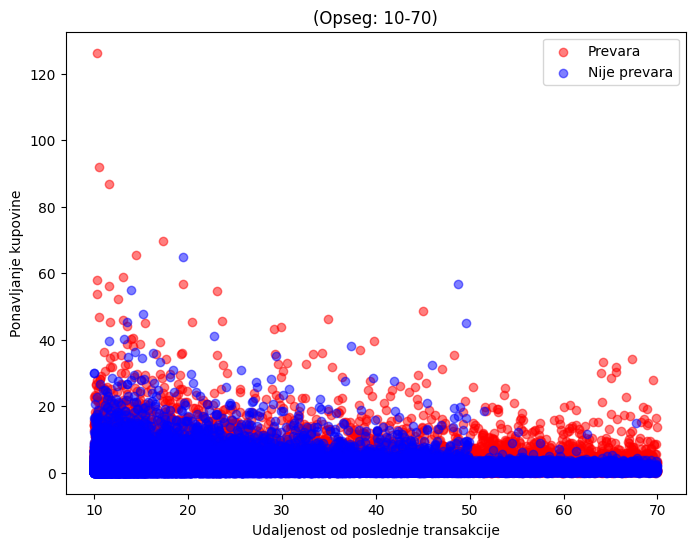

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/card_transdata.csv')
X = df.drop(['fraud'], axis=1)
y = df['fraud']

prevare = (y == 1)
x_prevara = X[prevare]
x_nije_prevara = X[~prevare]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_prevara[(x_prevara.iloc[:, 1] >= 10) & (x_prevara.iloc[:, 1] <= 70)].iloc[:, 1], x_prevara[(x_prevara.iloc[:, 1] >= 10) & (x_prevara.iloc[:, 1] <= 70)].iloc[:, 2], c='red', label='Prevara', alpha=0.5)
ax.scatter(x_nije_prevara[(x_nije_prevara.iloc[:, 1] >= 10) & (x_nije_prevara.iloc[:, 1] <= 70)].iloc[:, 1], x_nije_prevara[(x_nije_prevara.iloc[:, 1] >= 10) & (x_nije_prevara.iloc[:, 1] <= 70)].iloc[:, 2], c='blue', label='Nije prevara', alpha=0.5)

ax.set_xlabel('Udaljenost od poslednje transakcije')
ax.set_ylabel('Ponavljanje kupovine')
ax.set_title('(Opseg: 10-70)')
ax.legend()

plt.show()
